In [1]:
%cd /home/ahaase/pc/Daten/DWBA
from aastylebib import *
import reflectivity
import helper
from numpy import *

/home/ahaase/pc/Daten/DWBA


/home/ahaase/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data_color = "#A60628"
fit_color = "#348ABD"
third_color = "#467821"

In [3]:
grid = 30
N=400
angles = 90-np.linspace(3.7,3.9,500)
cr = 0.8
sc = 0.7
r, t, n, z = reflectivity.fields(angles,
                helper.nm2eV(6250)*ones(500),
                [cr/grid]*grid + [sc/grid]*grid,
                ["Cr"]*grid+["Sc"]*grid,
                N,
                None, 0.0,
                "Si", [1.0,1.0]*grid*2,
                      None,0,None,None,None)
sc1 = np.sum(np.transpose((np.array([N*([1.0]*grid + [0.0]*grid)])))*np.array(z[1:-1,:])*np.abs(r[1:-1]+t[1:-1])**2,axis=0)

In [4]:
import matplotlib.gridspec as gridspec

In [5]:
plt.cla()
plt.clf()
fig = plt.figure(figsize=(4,5))
gs = gridspec.GridSpec(40, 20)
gs.update(left=0.1, right=0.9, hspace=0.0, top=0.95, bottom=0.2)
ax2 = fig.add_subplot(gs[22:,:18])
ax1 = fig.add_subplot(gs[10:20,:18])
ax1_1 = fig.add_subplot(gs[:10,:18], sharex=ax1)
ax2_cb = fig.add_subplot(gs[22:,18:19])

ax1.plot(90-angles,
         np.sum(np.transpose((np.array([N*([1.0]*grid + [0.0]*grid)])))*np.array(z[1:-1,:])*np.abs(r[1:-1]+t[1:-1])**2,axis=0)/mean(np.sum(transpose((array([N*([1.0]*grid + [0.0]*grid)])))*array(z[1:-1,:])*np.abs(r[1:-1]+t[1:-1])**2,axis=0)), label='Cr', color=fit_color)
ax1.plot(90-angles,np.sum(np.transpose((np.array([N*([0.0]*grid + [1.0]*grid)])))*np.array(z[1:-1,:])*np.abs(r[1:-1]+t[1:-1])**2,axis=0)/mean(np.sum(transpose((array([N*([0.0]*grid + [1.0]*grid)])))*array(z[1:-1,:])*np.abs(r[1:-1]+t[1:-1])**2,axis=0)), label='Sc', color=data_color)
ax1.legend()
ax1_1.plot(90-angles,abs(r[0])**2, color=third_color)
res = (np.abs(r+t)**2)[1:-1,:]
im = ax2.imshow(res, aspect='auto', extent=(3.7,3.9,(cr+sc)*N,0), cmap='viridis', origin='upper', clim=(0.0,2.25))
cb = plt.colorbar(im, ax=ax2, cax=ax2_cb)
cb.set_label('relative Intensity')
#ax2_cb.yaxis.set_label_position('left')
#ax2_cb.yaxis.set_label_coords(0.8,0.5)
ax2.hlines(linspace(0,N*(cr+sc),N),3.7,3.9, color='w', linestyle='-', lw=1)
ax2.hlines(linspace(cr,N*(cr+sc)+cr,N),3.7,3.9, color='w', linestyle=':', lw=1)

ax1.set_xticklabels([])
ax1_1.set_xticklabels([])
#ax2.set_xticklabels([])

#ax1.set_yticklabels([])
#ax1_1.set_yticklabels([])
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')
ax1.yaxis.set_ticks_position('both')
#ax2.set_yticks([])

ax1.set_xlim((3.77,3.85))
ax1.set_ylim((0.4,1.8))
ax2.set_xlim((3.77,3.85))
ax2.set_ylim((5.0,0.0))

ax2.text(3.89, cr/2+cr/10, "Cr", color='w', verticalalignment='center', horizontalalignment='left',fontsize=8)
ax2.text(3.89, (2*cr+sc)/2+cr/10, "Sc", color='w', verticalalignment='center', horizontalalignment='left',fontsize=8)
ax2.text(3.89, cr/2+cr/10+(cr+sc), "Cr", color='w', verticalalignment='center', horizontalalignment='left',fontsize=8)
ax2.text(3.89, (2*cr+sc)/2+cr/10+(cr+sc), "Sc", color='w', verticalalignment='center', horizontalalignment='left',fontsize=8)
ax2.text(3.89, cr/2+cr/10+2*(cr+sc), "Cr", color='w', verticalalignment='center', horizontalalignment='left',fontsize=8)
ax2.text(3.89, (2*cr+sc)/2+cr/10+2*(cr+sc), "Sc", color='w', verticalalignment='center', horizontalalignment='left',fontsize=8)
ax2.text(0.1/4,0.95, "(c)", transform = ax2.transAxes, verticalalignment='top', bbox=dict(facecolor='w', alpha=0.7, edgecolor='none', pad=2.0))
ax1_1.text(0.1/4,0.9, "(a)", transform = ax1_1.transAxes, verticalalignment='top')
ax1.text(0.1/4,0.9, "(b)", transform = ax1.transAxes, verticalalignment='top')
ax2.set_xlabel('grazing angle of incidence $\\alpha_i^\\text{GI}$ / $^\circ$')

ax1.set_ylabel('relative F.Y.')
ax1_1.set_ylabel('reflectivity')
ax2.set_ylabel('depth $z$ / nm')



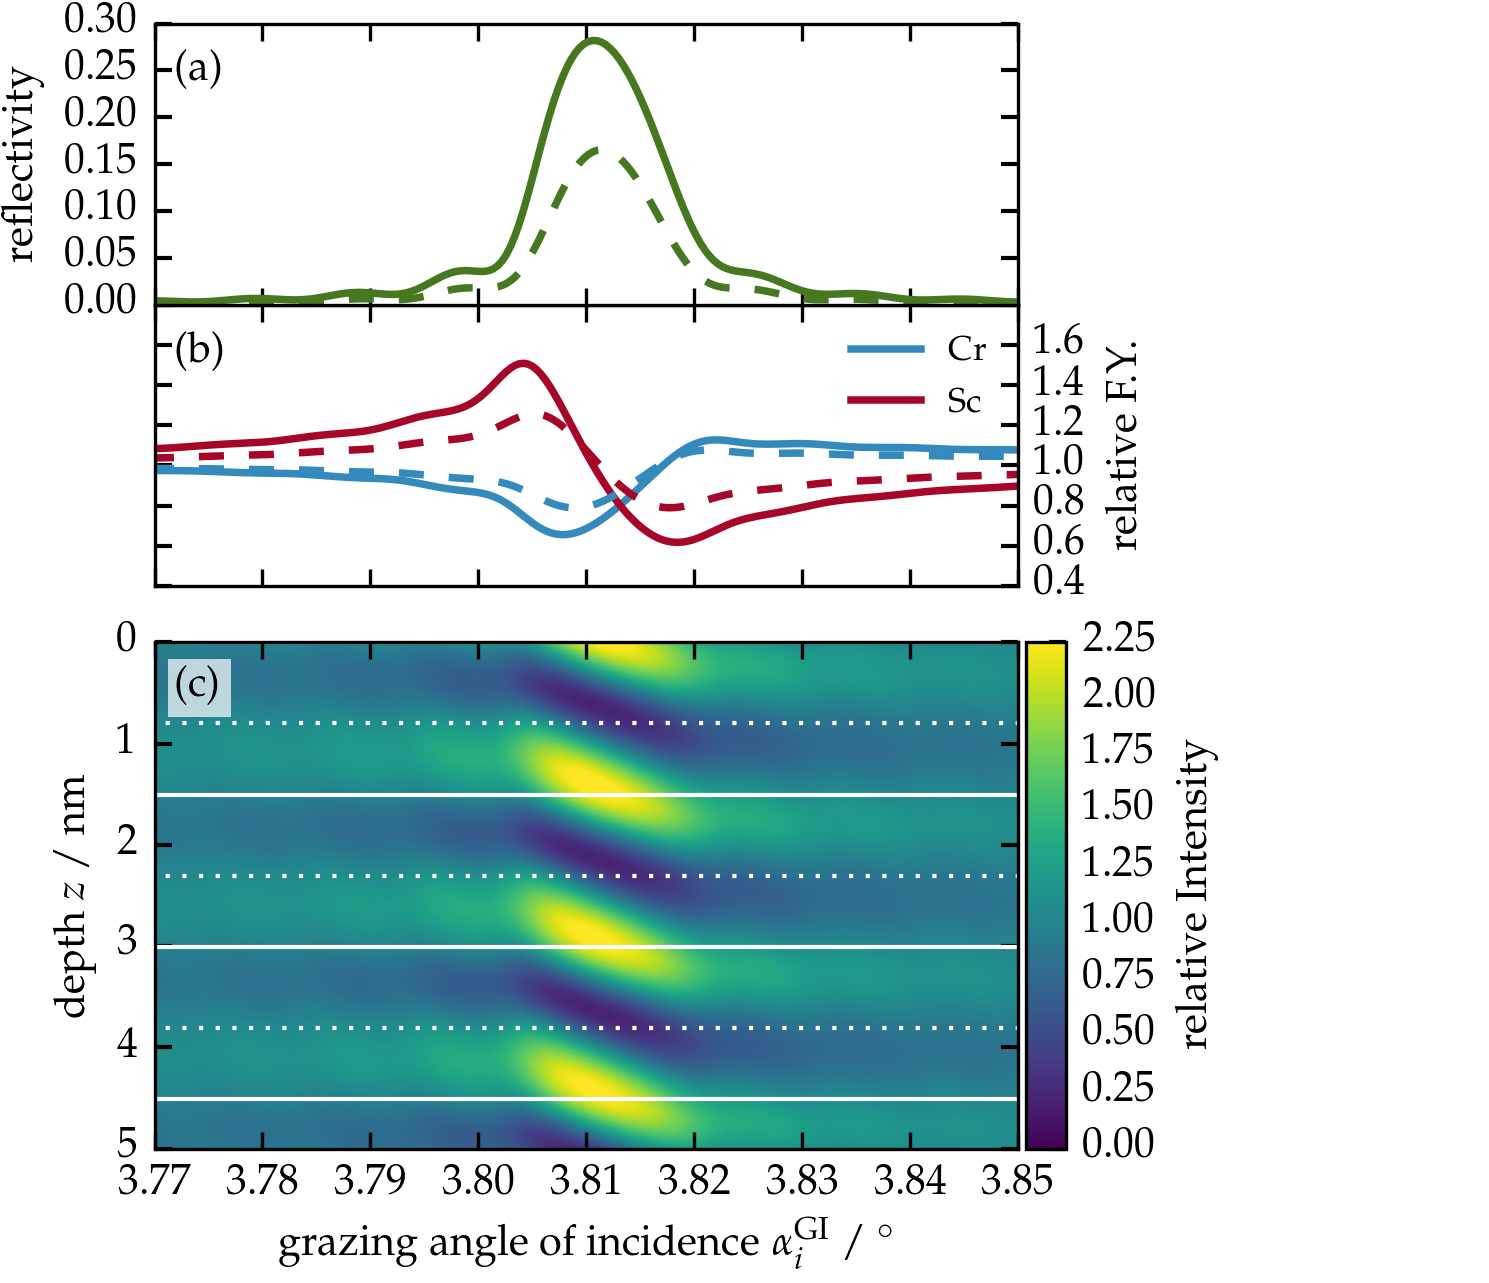

In [6]:
mix=0.1
sigma = np.array([0.0]+[1.2,0.1]*N+[0.0])
sigma = sigma.reshape((len(sigma),1))
intermix = np.array([mix,mix]*N+[0.0])
r, t, n, z = reflectivity.fields(angles,
                helper.nm2eV(6250)*ones(500),
                [cr,sc],
                ["Cr","Sc"],
                N,
                sigma, 0.0,
                "Si", [1.0,1.0],
                      intermix,30,None,None,None)

a=array([0.0]+[1.0,0.0]*400+[0.0])
th=array([0.0]+[cr,sc]*400+[0.0])
th = th.reshape(len(th),1)
a,tha = reflectivity.generate_mixlayers(a, th,intermix, sigma,30)
a = a.reshape(len(a),1)

cr2 = np.sum(a[1:]*((abs(r[1:]+t[1:])**2)*z[1:]),0)

a=array([0.0]+[0.0,1.0]*400+[0.0])
th=array([0.0]+[cr,sc]*400+[0.0])
th = th.reshape(len(th),1)
a,tha = reflectivity.generate_mixlayers(a, th,intermix, sigma,30)
a = a.reshape(len(a),1)

sc2 = np.sum(a[1:]*((abs(r[1:]+t[1:])**2)*z[1:]),0)

ax1.plot(90-angles,
         cr2/np.mean(cr2), label='Cr', color=fit_color, linestyle='--')
ax1.plot(90-angles,
         sc2/np.mean(sc2), label='Sc', color=data_color, linestyle='--')
ax1_1.plot(90-angles,abs(r[0])**2, color=third_color, linestyle='--')

plt.show()
#plt.savefig("/home/ahaase/Dropbox/PTB/Dissertation/thesis/img/XRF_scheme.pdf")